# 8. Hough Transform - Line and Circle Detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

**a)** Compare the functionality of `HoughLines()` and `HoughLinesP()` OpenCV functions for line detection.

**b)** Use `HoughLines()` to detect lines in images like those in figure 1.a and 1.b; try different parameter values; draw
the detected lines on the image.

**c)** Use `HoughLinesP()` to detect line segments in the same images that you used in the previous problem ; try
different parameter values; draw the detected line segments on the image.

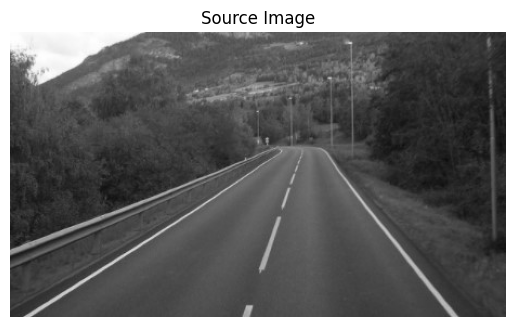

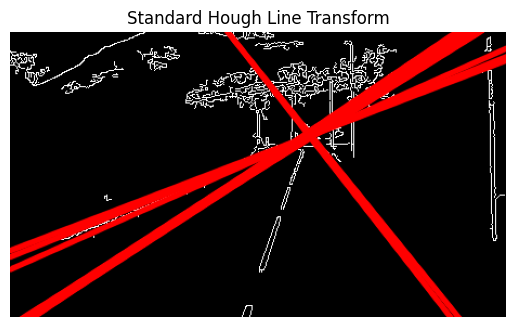

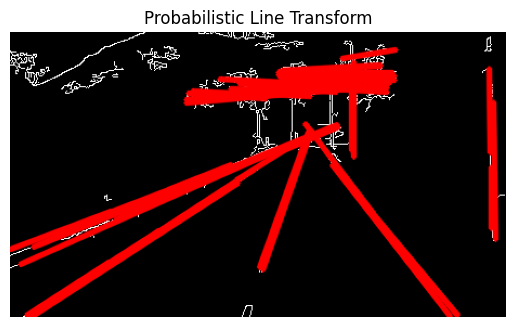

In [39]:
IMAGE_PATH = "../../images/streetLines_01.jpg"

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

display_image(image, "Source Image")

canny = cv2.Canny(image, 50, 200)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(canny, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for elem in lines:
        rho = elem[0][0]
        theta = elem[0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(cdst, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

display_image(cdst, "Standard Hough Line Transform")

linesP = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for elem in linesP:
        l = elem[0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)

display_image(cdstP, "Probabilistic Line Transform")

**d)** Use HoughCircles() to detect the coins present in images like those in figure 1.c and 1.d (without or with
superposition among the coins).

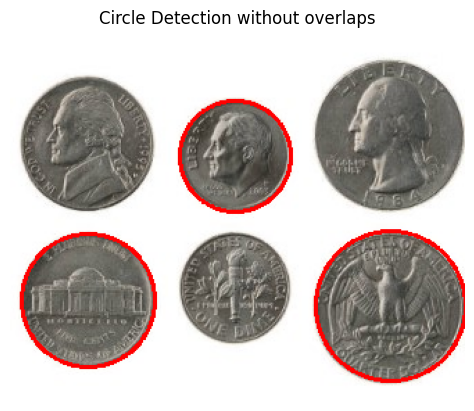

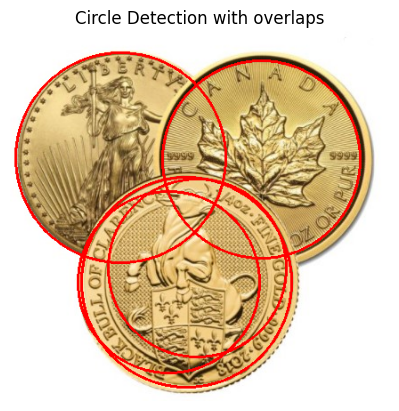

In [35]:
IMAGE_PATH_COINS = "../../images/coins_02.jpg"
IMAGE_PATH_COINS_1 = "../../images/coins_01.jpg"

src = cv2.imread(IMAGE_PATH_COINS, cv2.IMREAD_COLOR)
src1 = cv2.imread(IMAGE_PATH_COINS_1, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    1,
    20,
    param1=200,
    param2=100,
    minRadius=100,
    maxRadius=0,
)

circles1 = cv2.HoughCircles(
    gray1,
    cv2.HOUGH_GRADIENT,
    1,
    5,
    param1=200,
    param2=100,
    minRadius=0,
    maxRadius=0,
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(src, (i[0], i[1]), i[2], (0, 0, 255), 2)

if circles1 is not None:
    circles1 = np.uint16(np.around(circles1))
    for i in circles1[0, :]:
        cv2.circle(src1, (i[0], i[1]), i[2], (0, 0, 255), 2)

display_image(src1, "Circle Detection without overlaps")

display_image(src, "Circle Detection with overlaps")